In [1]:
from sklearn.preprocessing import scale
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
%matplotlib inline

In [3]:
#read csv
csvData1 = pd.read_csv("./1106/feature_final_label/feature_final/brute_force_feature.csv",sep=',',warn_bad_lines=False, error_bad_lines=False) #정상
csvData2 = pd.read_csv("./1106/feature_final_label/feature_final/ddos_feature.csv",sep=',',warn_bad_lines=False, error_bad_lines=False) #악성
csvData3 = pd.read_csv("./1106/feature_final_label/feature_final/friday_feature2.csv",sep=',',warn_bad_lines=False, error_bad_lines=False)
csvData4 = pd.read_csv("./1106/feature_final_label/feature_final/thursday_feature2.csv",sep=',',warn_bad_lines=False, error_bad_lines=False)
csvData5 = pd.read_csv("./1106/feature_final_label/feature_final/thursday_feature3.csv",sep=',',warn_bad_lines=False, error_bad_lines=False)
csvData6 = pd.read_csv("./1106/feature_final_label/feature_final/train_set1_feature.csv",sep=',',warn_bad_lines=False, error_bad_lines=False)
# csvData7 = pd.read_csv("./1106/feature_final_label/feature_final/train_set2_split1_feature.csv",sep=',',warn_bad_lines=False, error_bad_lines=False)
# csvData8 = pd.read_csv("./1106/feature_final_label/feature_final/train_set2_split2_feature.csv",sep=',',warn_bad_lines=False, error_bad_lines=False)
csvData9 = pd.read_csv("./1106/feature_final_label/feature_final/wednesday_feature2.csv",sep=',',warn_bad_lines=False, error_bad_lines=False)


In [4]:
csvData1=csvData1[['fl_dur', 'tot_fw_pk', 'tot_bw_pk', 'fw_iat_tot',
       'fw_iat_avg', 'fw_iat_std', 'fw_iat_max', 'fw_iat_min', 'bw_iat_tot',
       'bw_iat_avg', 'bw_iat_std', 'bw_iat_max', 'bw_iat_min01', 'fw_pkt_s',
       'bw_pkt_s', 'label']]
csvData2=csvData2[['fl_dur', 'tot_fw_pk', 'tot_bw_pk', 'fw_iat_tot',
       'fw_iat_avg', 'fw_iat_std', 'fw_iat_max', 'fw_iat_min', 'bw_iat_tot',
       'bw_iat_avg', 'bw_iat_std', 'bw_iat_max', 'bw_iat_min01', 'fw_pkt_s',
       'bw_pkt_s', 'label']]
csvData3=csvData3[['fl_dur', 'tot_fw_pk', 'tot_bw_pk', 'fw_iat_tot',
       'fw_iat_avg', 'fw_iat_std', 'fw_iat_max', 'fw_iat_min', 'bw_iat_tot',
       'bw_iat_avg', 'bw_iat_std', 'bw_iat_max', 'bw_iat_min01', 'fw_pkt_s',
       'bw_pkt_s', 'label']]
csvData4=csvData4[['fl_dur', 'tot_fw_pk', 'tot_bw_pk', 'fw_iat_tot',
       'fw_iat_avg', 'fw_iat_std', 'fw_iat_max', 'fw_iat_min', 'bw_iat_tot',
       'bw_iat_avg', 'bw_iat_std', 'bw_iat_max', 'bw_iat_min01', 'fw_pkt_s',
       'bw_pkt_s', 'label']]
csvData5=csvData5[['fl_dur', 'tot_fw_pk', 'tot_bw_pk', 'fw_iat_tot',
       'fw_iat_avg', 'fw_iat_std', 'fw_iat_max', 'fw_iat_min', 'bw_iat_tot',
       'bw_iat_avg', 'bw_iat_std', 'bw_iat_max', 'bw_iat_min01', 'fw_pkt_s',
       'bw_pkt_s', 'label']]
csvData6=csvData6[['fl_dur', 'tot_fw_pk', 'tot_bw_pk', 'fw_iat_tot',
       'fw_iat_avg', 'fw_iat_std', 'fw_iat_max', 'fw_iat_min', 'bw_iat_tot',
       'bw_iat_avg', 'bw_iat_std', 'bw_iat_max', 'bw_iat_min01', 'fw_pkt_s',
       'bw_pkt_s', 'label']]
# csvData7=csvData7[['fl_dur', 'tot_fw_pk', 'tot_bw_pk', 'fw_iat_tot',
#        'fw_iat_avg', 'fw_iat_std', 'fw_iat_max', 'fw_iat_min', 'bw_iat_tot',
#        'bw_iat_avg', 'bw_iat_std', 'bw_iat_max', 'bw_iat_min01', 'fw_pkt_s',
#        'bw_pkt_s', 'label']]
# csvData8=csvData8[['fl_dur', 'tot_fw_pk', 'tot_bw_pk', 'fw_iat_tot',
#        'fw_iat_avg', 'fw_iat_std', 'fw_iat_max', 'fw_iat_min', 'bw_iat_tot',
#        'bw_iat_avg', 'bw_iat_std', 'bw_iat_max', 'bw_iat_min01', 'fw_pkt_s',
#        'bw_pkt_s', 'label']]
csvData9=csvData9[['fl_dur', 'tot_fw_pk', 'tot_bw_pk', 'fw_iat_tot',
       'fw_iat_avg', 'fw_iat_std', 'fw_iat_max', 'fw_iat_min', 'bw_iat_tot',
       'bw_iat_avg', 'bw_iat_std', 'bw_iat_max', 'bw_iat_min01', 'fw_pkt_s',
       'bw_pkt_s', 'label']]

In [5]:
#concat csv
csvData = pd.concat([csvData1,csvData2,csvData3,csvData4,csvData5,csvData6,csvData9])
dfData= pd.DataFrame(data=csvData)

In [6]:
#labels 떼기
feature = dfData[ ['fl_dur','tot_fw_pk', 'tot_bw_pk', 'fw_iat_tot','fw_iat_avg', 'fw_iat_std', 'fw_iat_max', 'fw_iat_min', 'bw_iat_tot', 'bw_iat_avg', 'bw_iat_std', 'bw_iat_max', 'bw_iat_min01','fw_pkt_s','bw_pkt_s']]
feature.isnull().sum()
feature.shape

(308347, 15)

In [7]:
#preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit_transform(feature)
feature = scaler.fit_transform(feature)  #스케일된 dataset
feature.shape

(308347, 15)

In [8]:
# k-means

kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, random_state=0).fit(feature)
dfData['cluster']=kmeans.labels_


cluster       0      1      2    3    4     5
label                                        
0        227692      0      0  220    0     0
1             0      0      0    0    0   117
4             0     35      0    0    0     0
5             0    758      0    0  159  1275
6             0      8      0    0    0     0
8             0      0     45    0   12  3584
9             0  39926  30702    0  377  3437


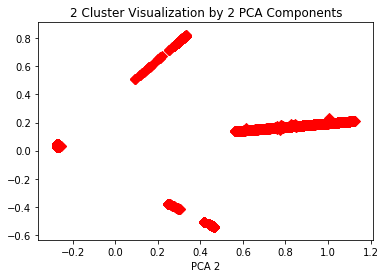

In [9]:
from sklearn.decomposition import PCA

pca= PCA(n_components=2)
pca_transformed = pca.fit_transform(feature)

dfData['pca_x']=pca_transformed[:, 0]
dfData['pca_y']=pca_transformed[:, 1]

marker0_ind = dfData[dfData['cluster']==0].index
marker1_ind = dfData[dfData['cluster']==1].index

plt.scatter(dfData['pca_x'],dfData['pca_y'],s=50,marker='D',c='r')
ct = pd.crosstab(dfData['label'],dfData['cluster'])


print(ct)
# ct.to_csv("table.csv",index=False)


plt.xlabel('PCA 1')
plt.xlabel('PCA 2')
plt.title('2 Cluster Visualization by 2 PCA Components')
plt.show()

In [10]:
test = pd.read_csv("./1106/data/test_set2_feature.csv",sep=',',warn_bad_lines=False, error_bad_lines=False)
test.head()

,SET,fl_dur,tot_fw_pk,tot_bw_pk,fw_iat_tot,fw_iat_avg,fw_iat_std,fw_iat_max,fw_iat_min,bw_iat_tot,bw_iat_avg,bw_iat_std,bw_iat_max,bw_iat_min01,fw_pkt_s,bw_pkt_s
0,203.248.44.111_80 10.89.249.86_25441.csv,0.042053,6,5,0.0,26971.000000,0.000000,0.0,0.0,0.0,26971.000000,0.000000,0.0,0.0,6,5
1,112.167.109.146_9330 10.89.239.191_80.csv,0.001100,1,1,0.0,26991.000000,-1.000000,-1.0,-1.0,0.0,26991.000000,-1.000000,-1.0,-1.0,1,1
2,203.248.44.111_80 121.161.26.149_1572.csv,0.059970,18,20,0.0,27002.000000,0.000000,0.0,0.0,0.0,27002.000000,0.000000,0.0,0.0,18,20
3,121.145.43.173_1202 203.248.44.183_443.csv,60.613845,6,7,0.0,26984.000000,0.000000,0.0,0.0,60.0,26992.571429,22.360680,60.0,0.0,6,6
4,10.89.237.151_4445 223.39.139.192_59645.csv,10.923239,39,52,11.0,26946.153846,1.449281,9.0,0.0,2.0,26945.596154,0.194108,1.0,0.0,28,34


In [11]:
test_no_set=test[['fl_dur', 'tot_fw_pk', 'tot_bw_pk', 'fw_iat_tot',
       'fw_iat_avg', 'fw_iat_std', 'fw_iat_max', 'fw_iat_min', 'bw_iat_tot',
       'bw_iat_avg', 'bw_iat_std', 'bw_iat_max', 'bw_iat_min01', 'fw_pkt_s',
       'bw_pkt_s']]

In [12]:
#preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit_transform(test_no_set)
feature = scaler.fit_transform(test_no_set)  #스케일된 dataset
feature.shape

(303288, 15)

In [14]:
predict = pd.DataFrame(kmeans.predict(feature))
predict.columns=['predict']
predict['predict'].value_counts()

1    250733
2     52555
Name: predict, dtype: int64